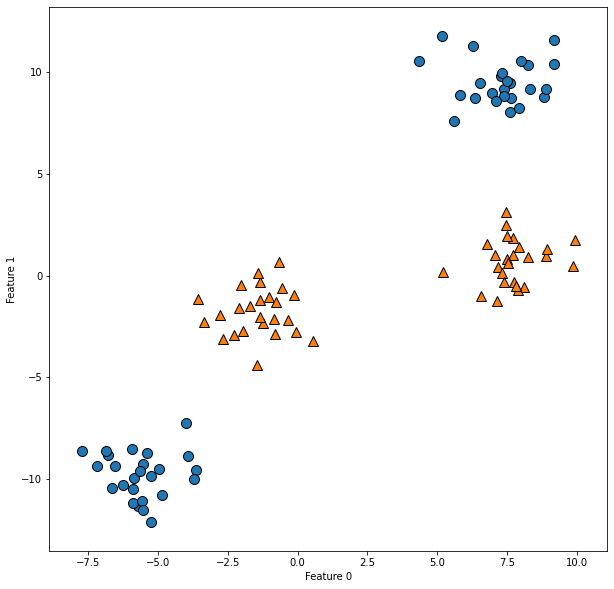

In [3]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.figure(figsize=(10,10))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [8]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
print("w shape:", linear_svm.coef_.shape)
print("b shape:", linear_svm.intercept_.shape)

w shape: (1, 2)
b shape: (1,)


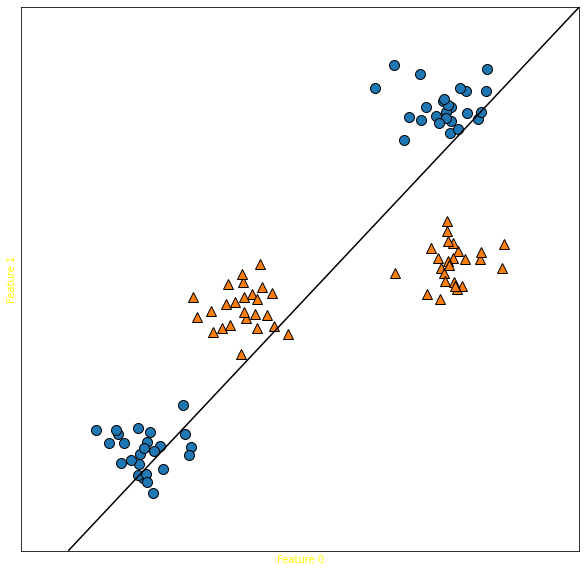

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.xaxis.label.set_color('yellow')
ax.yaxis.label.set_color('yellow')
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_2264\3302304533.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


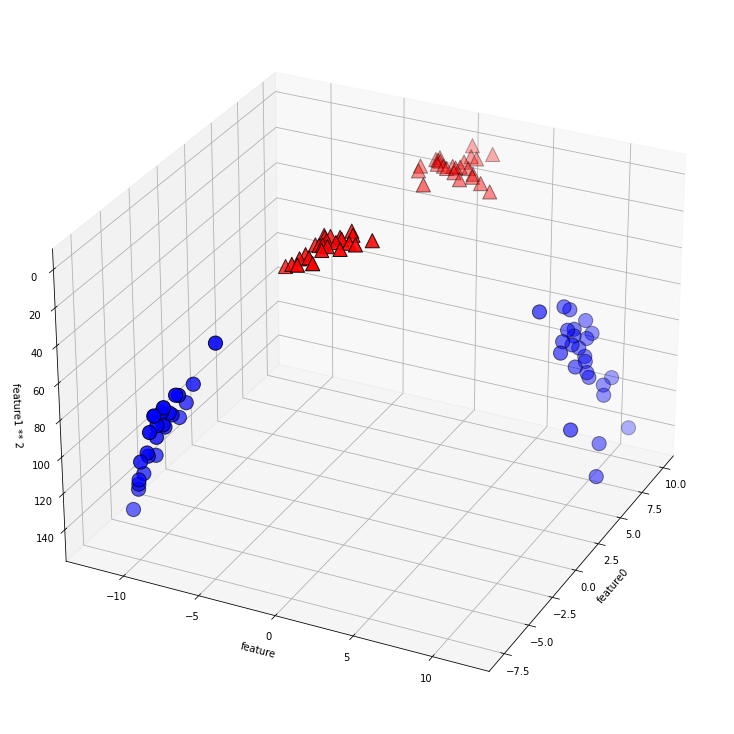

In [14]:
# 두 번째 feature를 제곱한 feature 1 ** 2 를 새로운 feature로 추가해 입력 feature를 확장해 보자  
# 이제 feature 0, feature 1 의 2차원 데이터 포인트가 아니라 3차원 데이터 포인트로 표현됨
import numpy as np

X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure(figsize=(10,10))
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=200, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=200, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature")
ax.set_zlabel("feature1 ** 2")
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_2264\1623966110.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


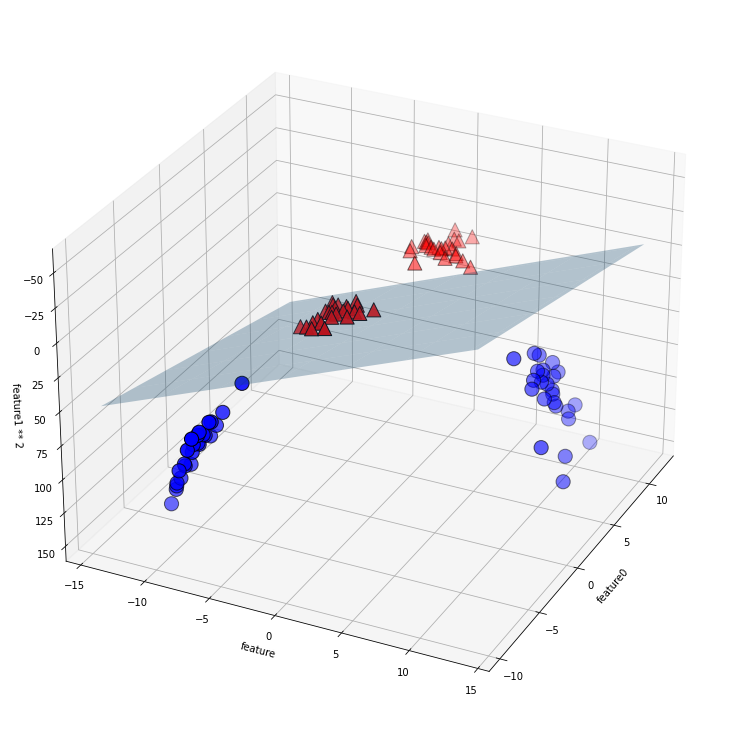

In [15]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure(figsize=(10,10))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=200, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=200, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature")
ax.set_zlabel("feature1 ** 2")
plt.show()

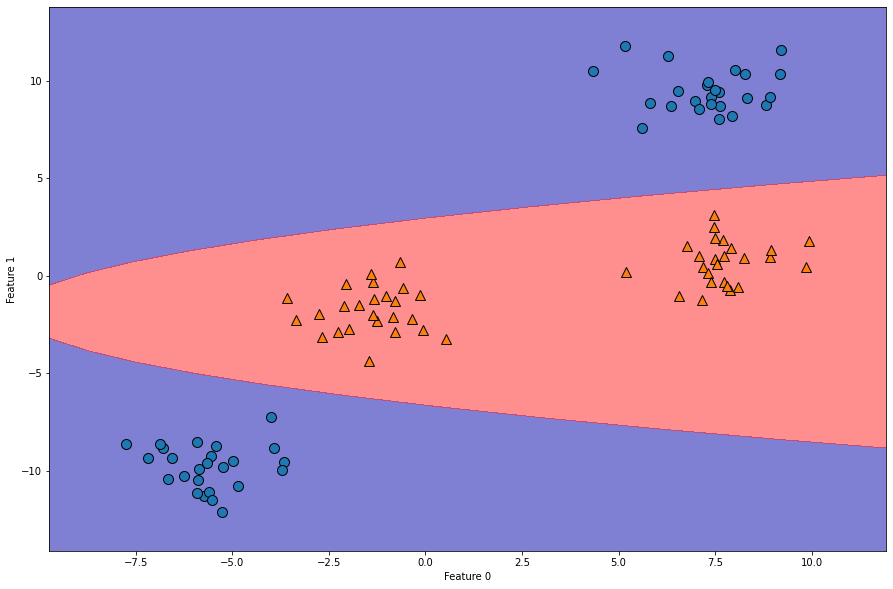

In [16]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.figure(figsize=(15, 10))
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [18]:
# ### 커널 기법
# - 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들어 봤음  
# - 많은 경우 어떤 특성을 추가해야 할 지 모르고 특성을 많이 추가하면 연산 비용이 커짐  
# - 수학적 기법을 사용하여 새로운 특성을 많이 만들지 않고 고차원에서 분류기를 학습시킬 수 있음, 이를 커널 기법(kernel trick)이라 함  
# - 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리를 계산함  
# - SVM에서 데이터를 고자원 공간에 매핑하는데 많이 사용하는 방법은 두 가지  
# - 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 다항식 커널이 있고  
# - 가우시안 커널로 불리우는 RBF(Radial Basis Function) 커널이 있음  
# - 가우시안 커널은 차원이 무한한 특성 공간에 매핑하는 것으로, 설명 및 이해하기 힘듬  
# - RBF 커널을 사용한 SVM이 결정을 만드는 방법은 비교적 쉽게 요약할 수 있음

In [19]:
# ### SVM 이해하기
# - 학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 됨  
# - 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 줌, 바로 두 클래스 사이의 경계에 위치한 데이터 포인트임  
# - 이런 데이터 포인트를 서포트 벡터(support vector) 라 하며, 여기서 서포트 벡터 머신이란 이름이 유래  
# - 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정함  
# - 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습함(SVC 객체의 dual_coef_ 속성에 저장됨)  
# - 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산됨  
# - k<sub>rbf</sub> (x<sub>1</sub>, x<sub>2</sub>) = exp(-$\gamma$ || x<sub>1</sub> - x<sub>2</sub> ||<sup>2</sup>)  
# - 여기서 x<sub>1</sub> 과 x<sub>2</sub> 는 데이터 포인트이며 || x<sub>1</sub> - x<sub>2</sub> ||<sup>2</sup> 는 유클리디안 거리이고, $\gamma$ 는 가우시안 커널의 폭을 제어하는 매개변수  
# - 다음은 두 개의 클래스를 가진 2차원 데이터셋에 서포트 벡터 머신을 학습시킨 결과를 보여줌  
# - 결정 경계는 검은 실선으로, 서포트 벡터는 굵은 테두리로 크게 그렸음  
# - forge 데이터셋에 SVM을 학습시켜 그래프를 그림

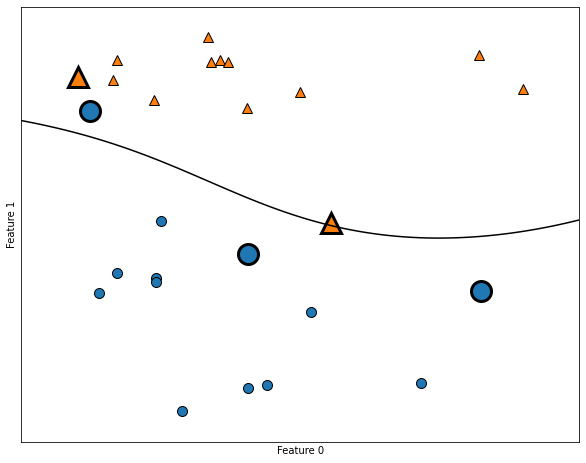

In [20]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
plt.figure(figsize=(10,8))
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=20, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [21]:
# ### SVM 매개변수 튜닝
# - gamma 매개변수는 앞의 공식에 나와 있는 $\gamma$ 로 가우시안 커널 폭의 역수에 해당  
# - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정  
# - 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적  
# - 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐  
# - C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수  
# - 이 매개변수는 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한함  

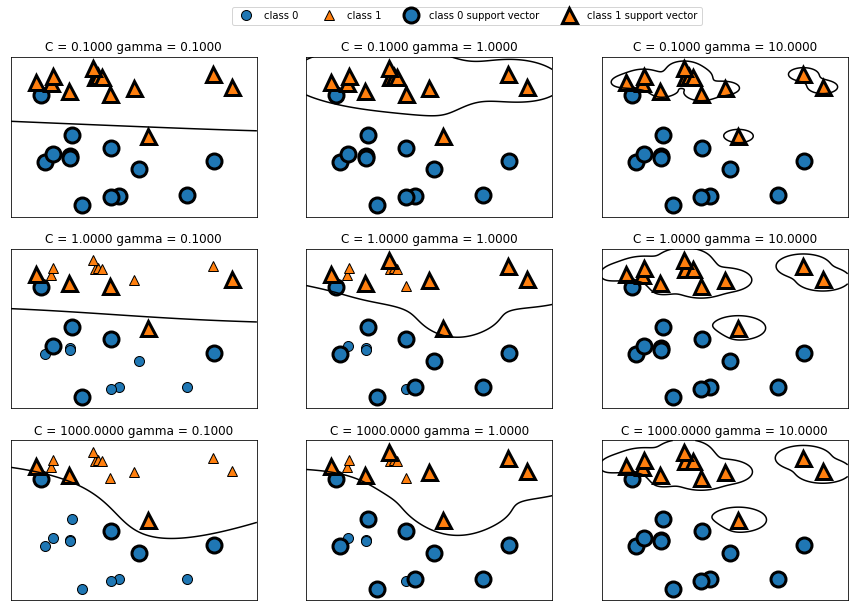

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc =SVC()
svc.fit(X_train, y_train)
print("Training score: {:.2f}".format(svc.score(X_train, y_train)))
print("Testing score: {:.2f}".format(svc.score(X_test, y_test)))

Training score: 0.90
Testing score: 0.94


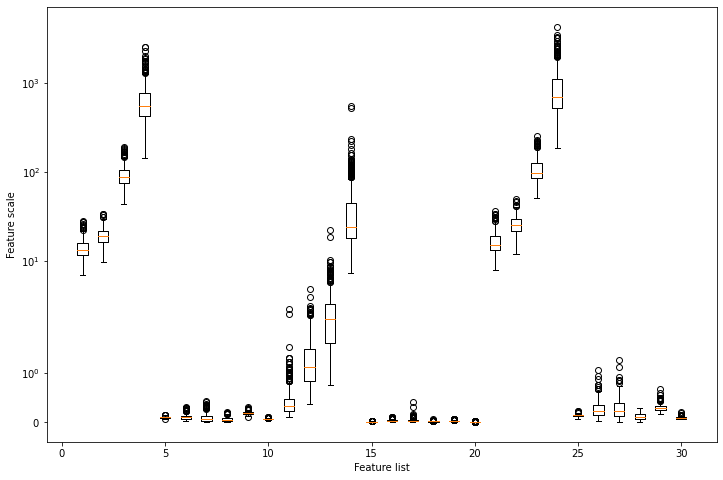

In [31]:
plt.figure(figsize=(12,8))
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature scale")
plt.show()

In [45]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training)/range_on_training
print("Feature min\n", X_train_scaled.min(axis=0))
print("Feature max\n", X_train_scaled.max(axis=1))
X_test_scaled = (X_test - min_on_training) / range_on_training

Feature min
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Feature max
 [0.43406194 0.6448169  0.76929461 0.37526652 0.61344372 0.40085288
 0.37797328 0.38838174 0.70360825 1.         0.60245658 0.61116542
 0.70131422 0.34701857 0.62953092 0.33029046 0.73062349 0.77678264
 0.43816631 0.53565277 0.65186722 0.47529054 0.87599035 0.71977843
 0.67998622 0.50537634 0.49211618 0.55448132 0.56446182 0.58835669
 0.45959596 0.54116431 0.69914196 0.54056696 0.5959596  0.48778104
 0.52704099 0.63900415 0.55358912 0.52771855 0.63360996 0.47219882
 0.55518672 0.43093352 0.6861084  0.72028936 0.27479092 0.85
 0.66551843 0.81101336 0.52210275 0.58075377 0.86358939 0.94143989
 0.42110874 0.45183013 0.64273859 0.42065819 0.51406539 0.55394191
 0.80896478 0.77574922 0.45151515 0.43340157 0.96440607 0.72786772
 0.30926628 0.5060424  0.30959596 0.67443703 0.36010101 0.81323372
 0.48050396 0.87564588 0.62202672 0.55265584 0.37198706 0.70349336
 0.46280004 0.47

In [44]:
print("Feature min\n", X_train_scaled.min(axis=0))
print("Feature max\n", X_train_scaled.max(axis=0))

Feature min
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Feature max
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [42]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Training score: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Testing score: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Training score: 0.98
Testing score: 0.97


In [47]:
# ### 장단점
# - 커널 서포트 벡터 머신은 강력한 모델이며 다양한 데이터셋에서 잘 작동함  
# - SVM은 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계를 만들 수 있음  
# - 저차원과 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음  
# - SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함  
# - 그래서 요즘엔 전처리가 거의 필요없는 랜덤 포레스트나 그레이디언트 부스팅 같은 트리 기반 모델을 많이 사용  
# - SVM 모델은 분석하기도 어려움, 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함